In [1]:
import numpy as np
import pandas as pd 
import os
print(os.listdir("../input"))

['sample_submission.csv', 'test.csv', 'README.md', 'train.csv', 'items.csv', 'shops.csv', 'item_categories.csv']


/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

%matplotlib inline
data = pd.read_csv('../input/train.csv')
print(data.head(3))
data.info()

         date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0  28.12.2014              23       25    12179  959.000000           1.0   
1  23.04.2014              15       25    14042  149.000000           1.0   
2  03.03.2014              14       12    11373  106.615385          13.0   

        ID  
0  2317582  
1  1576962  
2  1547382  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925849 entries, 0 to 2925848
Data columns (total 7 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
ID                int64
dtypes: float64(2), int64(4), object(1)
memory usage: 156.3+ MB


In [4]:
# Check for negative item_cnt_day 
data[data['item_cnt_day']<0]['item_cnt_day'].value_counts()

-1.0     7221
-2.0       78
-3.0       13
-5.0        4
-4.0        3
-6.0        2
-22.0       1
-9.0        1
-16.0       1
Name: item_cnt_day, dtype: int64

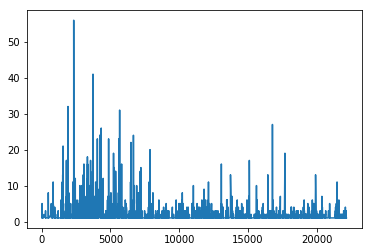

In [5]:
plt.plot(data[data['item_cnt_day']<0]['item_id'].value_counts().sort_index())

In [6]:
data_filtered=data.loc[data['item_cnt_day']>0]
data_filtered.info()
data=data_filtered

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2918525 entries, 0 to 2925848
Data columns (total 7 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
ID                int64
dtypes: float64(2), int64(4), object(1)
memory usage: 178.1+ MB


In [7]:
item_categories = pd.read_csv('../input/items.csv')
item_categories.head(3)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40


In [8]:
dt=pd.merge(data, item_categories, how='inner')
dt.sort_values(by=['date'], inplace=True)
dt.head(3)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,ID,item_name,item_category_id
636591,01.01.2013,0,19,10658,599.0,2.0,10343,Головоломка Кубик Рубика 3х3,67
1961580,01.01.2013,0,54,7527,299.0,1.0,86555,V/A Романтические хиты Best,55
2912669,01.01.2013,0,7,20481,949.0,1.0,55538,Фигурка Futurama Bender Super Heavyweights ник...,72


In [9]:
## Drop column which is unused
columns=['date','item_price','item_name']
for c in columns:
    if c in dt:
        dt.drop(c, axis = 1, inplace = True)
dt[(dt['item_cnt_day']>0)].head(3)

,date_block_num,shop_id,item_id,item_cnt_day,ID,item_category_id
636591,0,19,10658,2.0,10343,67
1961580,0,54,7527,1.0,86555,55
2912669,0,7,20481,1.0,55538,72


In [10]:

#Group by 'date_block_num', 'shop_id','item_id' and 
#sum the item count per day to get the sum for each month (or date_block_num)

dtf=dt.groupby(['date_block_num', 'shop_id','item_id'])[["item_cnt_day"]].sum().reset_index()

In [11]:
print(data.size)
print(dtf.size)

20429675
6418680


<Figure size 432x288 with 0 Axes>

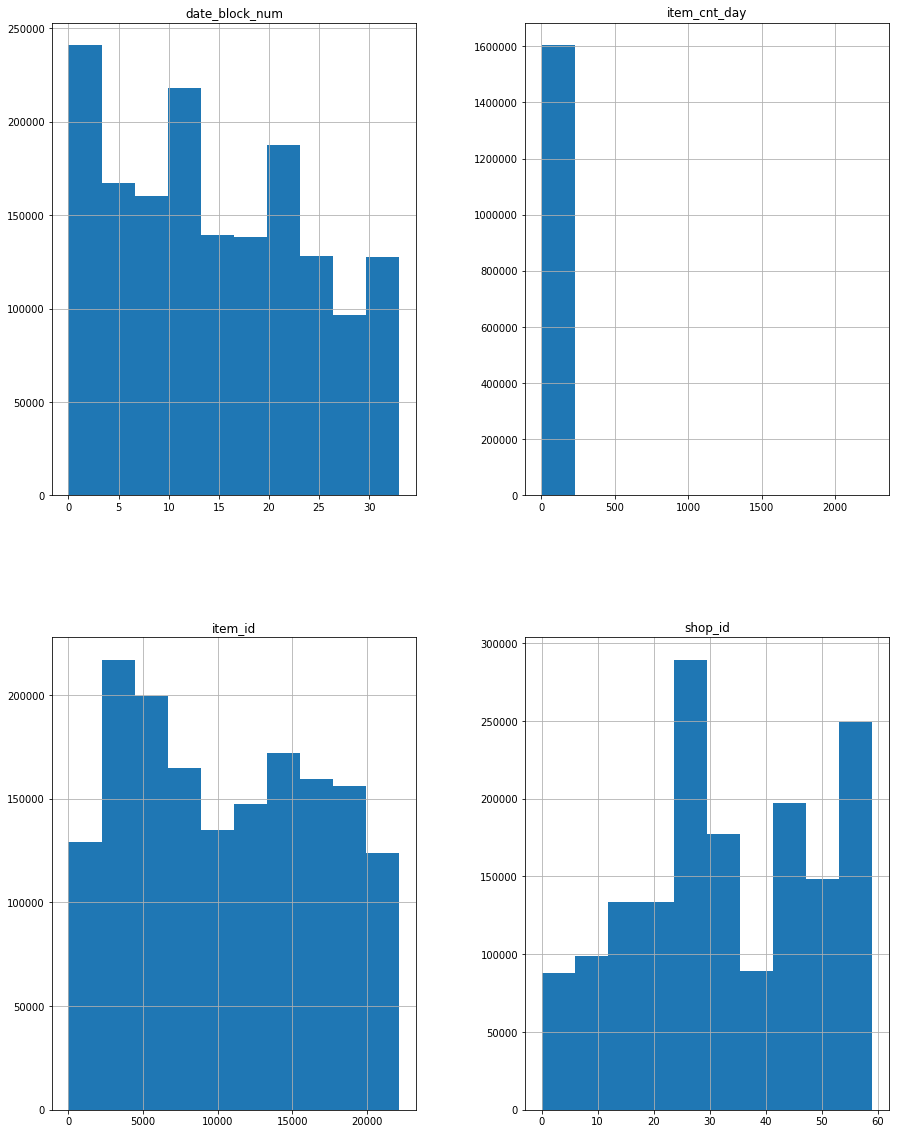

<Figure size 432x288 with 0 Axes>

In [12]:
dtf.hist(figsize=(15,20))
plt.figure()

<Figure size 432x288 with 0 Axes>

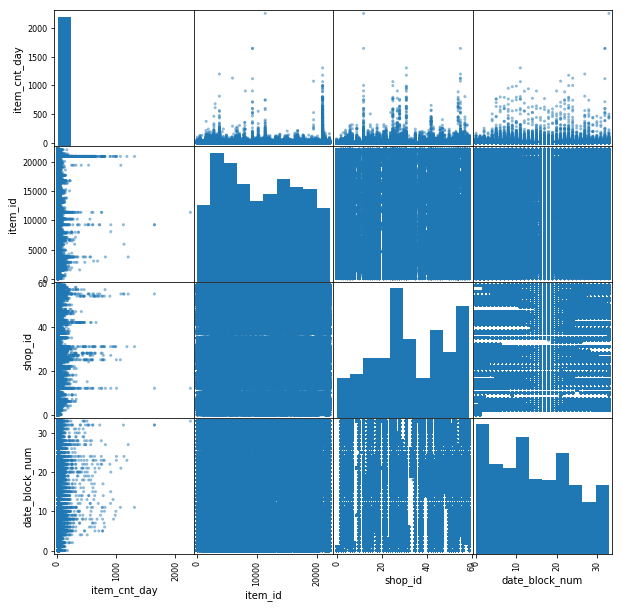

<Figure size 432x288 with 0 Axes>

In [13]:
pd.plotting.scatter_matrix(dtf[['item_cnt_day','item_id','shop_id','date_block_num']],figsize=(10,10))
plt.figure()

In [14]:
dtf[(dtf['item_id']==2929) & (dtf['shop_id']==0)]

,date_block_num,shop_id,item_id,item_cnt_day
222,0,0,2929,7.0
63282,1,0,2929,11.0


In [15]:
dt[(dt['item_id']==2929) & (dt['shop_id']==0)]

,date_block_num,shop_id,item_id,item_cnt_day,ID,item_category_id
1308212,1,0,2929,1.0,175283,30
1307977,0,0,2929,1.0,39684,30
1309030,1,0,2929,1.0,175282,30
1307940,0,0,2929,1.0,39686,30
1309244,1,0,2929,1.0,175281,30
1309571,0,0,2929,1.0,39699,30
1309640,1,0,2929,1.0,175280,30
1308166,1,0,2929,1.0,175279,30
1307842,0,0,2929,1.0,39687,30
1308851,1,0,2929,1.0,175278,30


<BarContainer object of 60 artists>

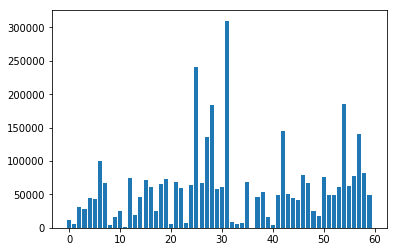

In [16]:
test_shop_id=dt.groupby(['shop_id'])[["item_cnt_day"]].sum().reset_index()
test_shop_id.head()
plt.bar(test_shop_id['shop_id'],test_shop_id ["item_cnt_day"])

count    21794.000000
mean     11098.519317
std       6396.860317
min          0.000000
25%       5551.250000
50%      11104.500000
75%      16646.750000
max      22169.000000
Name: item_id, dtype: float64
5822     1
17717    1
3732     1
20949    1
2808     1
Name: item_id, dtype: int64


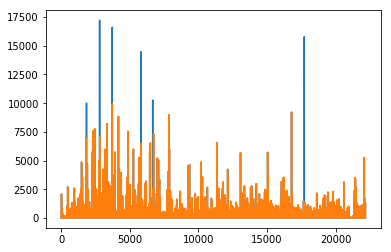

In [17]:

#Analyze item_id outliers

test_item_id=dt.groupby(['item_id'])[["item_cnt_day"]].sum().reset_index()
plt.plot(test_item_id[(test_item_id['item_id']!=20949)]['item_id'],test_item_id[(test_item_id['item_id']!=20949)] ["item_cnt_day"])
plt.plot(test_item_id[(test_item_id['item_cnt_day']<=10000)]['item_id'],test_item_id[(test_item_id['item_cnt_day']<=10000)]["item_cnt_day"])

print(test_item_id[(test_item_id['item_id']!=20949)]['item_id'].describe())
print(test_item_id[(test_item_id['item_cnt_day']>12000)]['item_id'].value_counts())



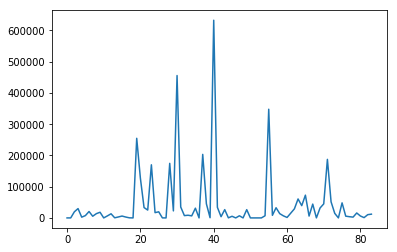

In [18]:
test_item_id=dt.groupby(['item_category_id'])[["item_cnt_day"]].sum().reset_index()
plt.plot(test_item_id['item_category_id'],test_item_id["item_cnt_day"])

2446908


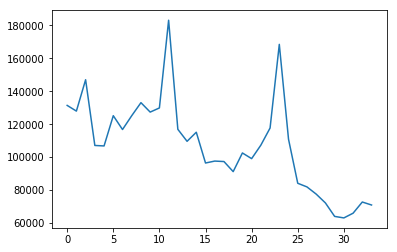

In [19]:

#Try to remove outliers (december months)

plt.plot(dt.groupby(['date_block_num'])[["item_cnt_day"]].sum())
dt_filtered=dt.loc[(dt['date_block_num'] ==9) | (dt['date_block_num'] ==10) | (dt['date_block_num'] ==21)| (dt['date_block_num'] ==22) | (dt['date_block_num'] ==33)]
print(dt_filtered.size)



In [20]:
dt_filtered['date_block_num'].value_counts()

10    96163
9     93622
22    85953
21    78883
33    53197
Name: date_block_num, dtype: int64

In [21]:
pd.options.mode.chained_assignment = None  # default='warn'

idx=dt_filtered.loc[(dt_filtered['date_block_num'] ==9)].index.values
dt_filtered.at[idx,'date_block_num']=0
dt_filtered.at[idx,'year']=1

idx=dt_filtered.loc[(dt_filtered['date_block_num'] ==10)].index.values
dt_filtered.at[idx,'date_block_num']=1
dt_filtered.at[idx,'year']=1

idx=dt_filtered.loc[(dt_filtered['date_block_num'] ==21)].index.values
dt_filtered.at[idx,'date_block_num']=0
dt_filtered.at[idx,'year']=2

idx=dt_filtered.loc[(dt_filtered['date_block_num'] ==22)].index.values
dt_filtered.at[idx,'date_block_num']=1
dt_filtered.at[idx,'year']=2

idx=dt_filtered.loc[(dt_filtered['date_block_num'] ==33)].index.values
dt_filtered.at[idx,'date_block_num']=0
dt_filtered.at[idx,'year']=3
print(dt_filtered['date_block_num'].value_counts())
print(dt_filtered['year'].value_counts())

0    225702
1    182116
Name: date_block_num, dtype: int64
1.0    189785
2.0    164836
3.0     53197
Name: year, dtype: int64


         date_block_num  shop_id  item_id  item_cnt_day       ID  \
1088328               0       55     2381           1.0   957288   
168366                0       31     7071           1.0   948033   
783252                0       19     3183           1.0  1000847   
2215571               0       57    21566           1.0   992975   
109330                0       30    21377           1.0   964044   

         item_category_id  year  
1088328                31   1.0  
168366                 19   1.0  
783252                 30   1.0  
2215571                40   1.0  
109330                 40   1.0  


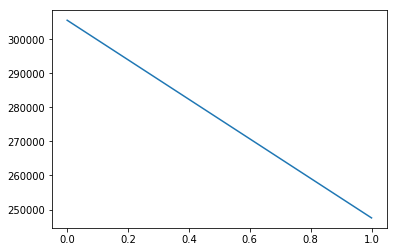

In [22]:
plt.plot(dt_filtered.groupby(['date_block_num'])[["item_cnt_day"]].sum())
print(dt_filtered.head())

In [23]:
dt_filtered.to_csv('sales_train_trans_filtered.csv', sep=',',index=False)

In [24]:
dt.to_csv('sales_train_trans.csv', sep=',',index=False)

In [25]:

#Prepare test data : adding category column

sales_test = pd.read_csv('../input/test.csv')
sales_test.head(3)



,date,date_block_num,shop_id,item_id,item_price,ID
0,06.02.2015,25,31,11208,699.0,2472142
1,21.11.2013,10,31,19525,149.0,1044690
2,03.01.2015,24,42,16169,299.0,2367559


In [26]:
sales_test1=pd.merge(sales_test, item_categories, how='inner')
sales_test1.sort_values(by=['ID'], inplace=True)
sales_test1.head(3)

,date,date_block_num,shop_id,item_id,item_price,ID,item_name,item_category_id
3034,07.01.2013,0,25,2920,599.0,83,Disney. LEGO Пираты Карибского моря (Essential...,21
5466,06.01.2013,0,25,2330,599.0,808,"Call of Duty: Black Ops [PC, Jewel, русская ве...",30
5729,22.01.2013,0,25,4791,799.0,1172,"Max Payne 3 [PC, русские субтитры]",28


In [27]:
sales_test1['shop_id'].value_counts()

31    870
25    615
28    502
54    501
57    399
27    382
42    380
6     284
58    252
50    238
56    233
46    216
7     209
21    208
19    204
35    204
15    200
16    186
26    186
30    186
47    185
53    183
24    178
18    169
38    162
51    161
43    154
29    148
41    144
5     144
44    143
22    143
37    141
59    137
4     129
52    121
14    113
55    111
45     99
12     90
10     81
2      78
17     74
3      70
48     59
13     59
49     45
39     44
0      31
34     25
32     22
23     20
1      19
33     17
40     17
9      15
8       7
20      6
36      1
Name: shop_id, dtype: int64

In [28]:
sales_test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 3034 to 252
Data columns (total 8 columns):
date                10000 non-null object
date_block_num      10000 non-null int64
shop_id             10000 non-null int64
item_id             10000 non-null int64
item_price          10000 non-null float64
ID                  10000 non-null int64
item_name           10000 non-null object
item_category_id    10000 non-null int64
dtypes: float64(1), int64(5), object(2)
memory usage: 703.1+ KB


In [29]:
sales_test1.isnull().sum()

date                0
date_block_num      0
shop_id             0
item_id             0
item_price          0
ID                  0
item_name           0
item_category_id    0
dtype: int64

In [30]:
sales_test1['item_id'].value_counts().count()

4812

In [31]:
sales_test1['item_category_id'].value_counts().count()

69

In [32]:
dt['item_category_id'].value_counts().count()

84

In [33]:

##Item_category_id that can be removed

#pd.concat([pd.unique(sales_test1['item_category_id']),pd.unique(sales_test1['item_category_id'])]).drop_duplicates(keep=False)
#print("sales_test1['item_category_id']-->",pd.unique(sales_test1['item_category_id']))
#print("dt['item_category_id']-->",pd.unique(dt['item_category_id']))
#print("concatenate-->", np.concatenate((pd.unique(sales_test1['item_category_id']),pd.unique(dt['item_category_id'])),axis=0))
np.unique(np.concatenate((pd.unique(sales_test1['item_category_id']),pd.unique(dt['item_category_id'])),axis=0))

a=set(pd.unique(dt['item_category_id']));
b=set(pd.unique(sales_test1['item_category_id']));

list(a-b)



[0, 1, 36, 68, 10, 74, 46, 48, 18, 50, 51, 52, 53, 26, 27]

In [34]:
sales_test1.drop('item_name', axis = 1, inplace = True)
sales_test1.to_csv('sales_test1.csv', sep=',',index=False)